In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Subplot
import os
from scipy.optimize import curve_fit
import numpy as np
import math
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

In [4]:
def func(x, a,u, sig):
    return a*np.exp(-(x - u) ** 2 / (2 * sig ** 2)) / (sig * math.sqrt(2 * math.pi))

In [5]:
def get_curve_fit_param(x,y,opt_fun,p0):    
    poptg,pcov = curve_fit(opt_fun,x,y,p0=p0,maxfev = 60000) #bounds=(0, [2, 24., 2])
    err = np.sqrt(np.sum((opt_fun(x,*poptg) - y)**2)/len(x))
    print(err)
    print(poptg)
    print(pcov)
    return poptg

In [6]:
def weib(x,a, scale, shape):
    return 44*(shape / scale) * ((x-a) / scale)**(shape - 1) * np.exp(-((x-a) / scale) ** shape)
def weibp(x,a, scale, shape):
    return (shape / scale) * ((x-a) / scale)**(shape - 1) * np.exp(-((x-a) / scale) ** shape)

In [7]:
dir_path = r'./使用数据'
DFs = []
for root, dirs, files in os.walk(dir_path):  #第一个为起始路径，第二个为起始路径下的文件夹，第三个是起始路径下的文件。
    for file in files:
        file_path=os.path.join(root,file)  #将路径名和文件名组合成一个完整路径
        df = pd.read_excel(file_path) #excel转换成DataFrame
        DFs.append(df)

In [8]:
df= pd.concat(DFs)

In [9]:
df = df.query('50>胸径>20')

In [10]:
df.sample(5)

,编号,树种,胸径,树高,南北冠幅,东西冠幅,x,y
14,15,麻栎,37.8,18.7,6.5,5.8,-0.54,-4.18
16,17,麻栎,38.3,18.2,3.9,3.8,-6.21,-1.42
11,12,麻栎,35.0,18.9,6.3,5.9,1.17,-4.03
22,23,麻栎,35.1,19.3,7.9,8.7,-6.86,0.23
9,10,麻栎,28.3,14.8,2.9,2.8,-5.87,2.69


1.1431974494553507
[90.08726309 34.71217059  5.44705931]
[[ 1.00931432e+02 -2.37181138e-02  4.23027121e+00]
 [-2.37181138e-02  4.84140813e-01 -2.42346246e-03]
 [ 4.23027121e+00 -2.42346246e-03  5.07279025e-01]]
2.134592118910415
[22.99999888 12.82509113  3.69233892]
[[ 439.0782596  -426.69314879 -132.87174075]
 [-426.69314879  416.7317552   129.25318858]
 [-132.87174075  129.25318858   41.68662258]]
1.6624313246399758
[37.76946305 18.45750294  1.46381641]
[[3.05914292e+01 2.95841345e-02 8.30693827e-01]
 [2.95841345e-02 6.01006614e-02 1.93870086e-03]
 [8.30693827e-01 1.93870086e-03 6.35965686e-02]]
1.8450159841416869
[10.99999763  8.0247203   4.77303365]
[[ 87.50883855 -85.74165846 -54.50756809]
 [-85.74165846  84.11189924  53.41237445]
 [-54.50756809  53.41237445  34.48047594]]
0.02540438776607902
[ 2.00194605 34.71218249  5.44709639]
[[ 0.04984537 -0.00052716  0.09401453]
 [-0.00052716  0.48418472 -0.00242389]
 [ 0.09401453 -0.00242389  0.50733387]]
0.04661399792486286
[22.99997918 12

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


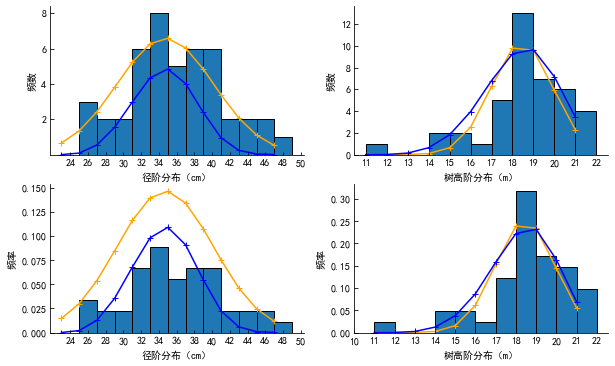

In [11]:
x=np.array(df['胸径'])
fig = plt.figure(figsize=(10, 6))
ax = Subplot(fig, 221)
fig.add_subplot(ax)
ax.axis["right"].set_visible(False)
ax.axis["top"].set_visible(False)
n,bins,c = ax.hist(df['胸径'],bins=range(23,51,2),edgecolor='black')
y=n
x=bins[:-1]
ztfb = get_curve_fit_param(x,y,func,p0=[5,35,6])    
ztfbpre = func(x,*ztfb)
# ax.plot(x,y,'r*',ls='-')
ax.plot(x,ztfbpre,'b+',ls='-',color='orange')
wbfb = get_curve_fit_param(x,y,weib,p0=[20,20,5])    
wbfbpre = weib(x,*wbfb)
# plt.plot(x,y,'r*')
ax.plot(x,wbfbpre,'b+',ls='-')
plt.xticks(range(24,51,2))
plt.xlabel('径阶分布（cm）')
plt.ylabel('频数')
plt.yticks([2,4,6,8])
ax1 = Subplot(fig, 222)
fig.add_subplot(ax1)
ax1.axis["right"].set_visible(False)
ax1.axis["top"].set_visible(False)
n1,bins1,c1 = ax1.hist(df['树高'],bins=range(11,23,1),edgecolor='black')
y1=n1
x1=bins1[:-1]
ztfb1 = get_curve_fit_param(x1,y1,func,p0=[2,19,6])    
ztfbpre1 = func(x1,*ztfb1)
# ax.plot(x,y,'r*',ls='-')
ax1.plot(x1,ztfbpre1,'b+',ls='-',color='orange')
wbfb1 = get_curve_fit_param(x1,y1,weib,p0=[10,20,5])    
wbfbpre1 = weib(x1,*wbfb1)
# plt.plot(x,y,'r*')
ax1.plot(x1,wbfbpre1,'b+',ls='-')
plt.xticks(range(11,23,1))
plt.xlabel('树高阶分布（m）')
plt.ylabel('频数')

ax2 = Subplot(fig, 223)
fig.add_subplot(ax2)
ax2.axis["right"].set_visible(False)
ax2.axis["top"].set_visible(False)
n2,bins2,c2 = ax2.hist(df['胸径'],bins=range(23,51,2),edgecolor='black',density=True)
y2=n2/np.sum(n2)
x2=bins2[:-1]
ztfb2 = get_curve_fit_param(x2,y2,func,p0=[5,35,6])    
ztfbpre2 = func(x2,*ztfb2)
# ax.plot(x,y,'r*',ls='-')
ax2.plot(x2,ztfbpre2,'b+',ls='-',color='orange')
wbfb2 = get_curve_fit_param(x2,y2,weibp,p0=[15,20,5])    
wbfbpre2 = weibp(x2,*wbfb2)
# plt.plot(x,y,'r*')
ax2.plot(x2,wbfbpre2,'b+',ls='-')
plt.xticks(range(24,51,2))
plt.xlabel('径阶分布（cm）')
plt.ylabel('频率')
ax3 = Subplot(fig, 224)
fig.add_subplot(ax3)
ax3.axis["right"].set_visible(False)
ax3.axis["top"].set_visible(False)
n3,bins3,c3 = ax3.hist(df['树高'],bins=range(11,23,1),edgecolor='black',density=True)
y3=n3/np.sum(n3)
x3=bins3[:-1]
ztfb3 = get_curve_fit_param(x3,y3,func,p0=[5,35,6])    
ztfbpre3 = func(x3,*ztfb3)
# ax.plot(x,y,'r*',ls='-')
ax3.plot(x3,ztfbpre3,'b+',ls='-',color='orange')
wbfb3 = get_curve_fit_param(x3,y3,weibp,p0=[10,20,5])    
wbfbpre3 = weibp(x3,*wbfb3)
# plt.plot(x,y,'r*')
ax3.plot(x3,wbfbpre3,'b+',ls='-')
plt.xticks(range(10,23,1))
plt.xlabel('树高阶分布（m）')
plt.ylabel('频率')
plt.savefig(r'./输出数据/频数频率分布.jpg',dpi=300)
plt.show()

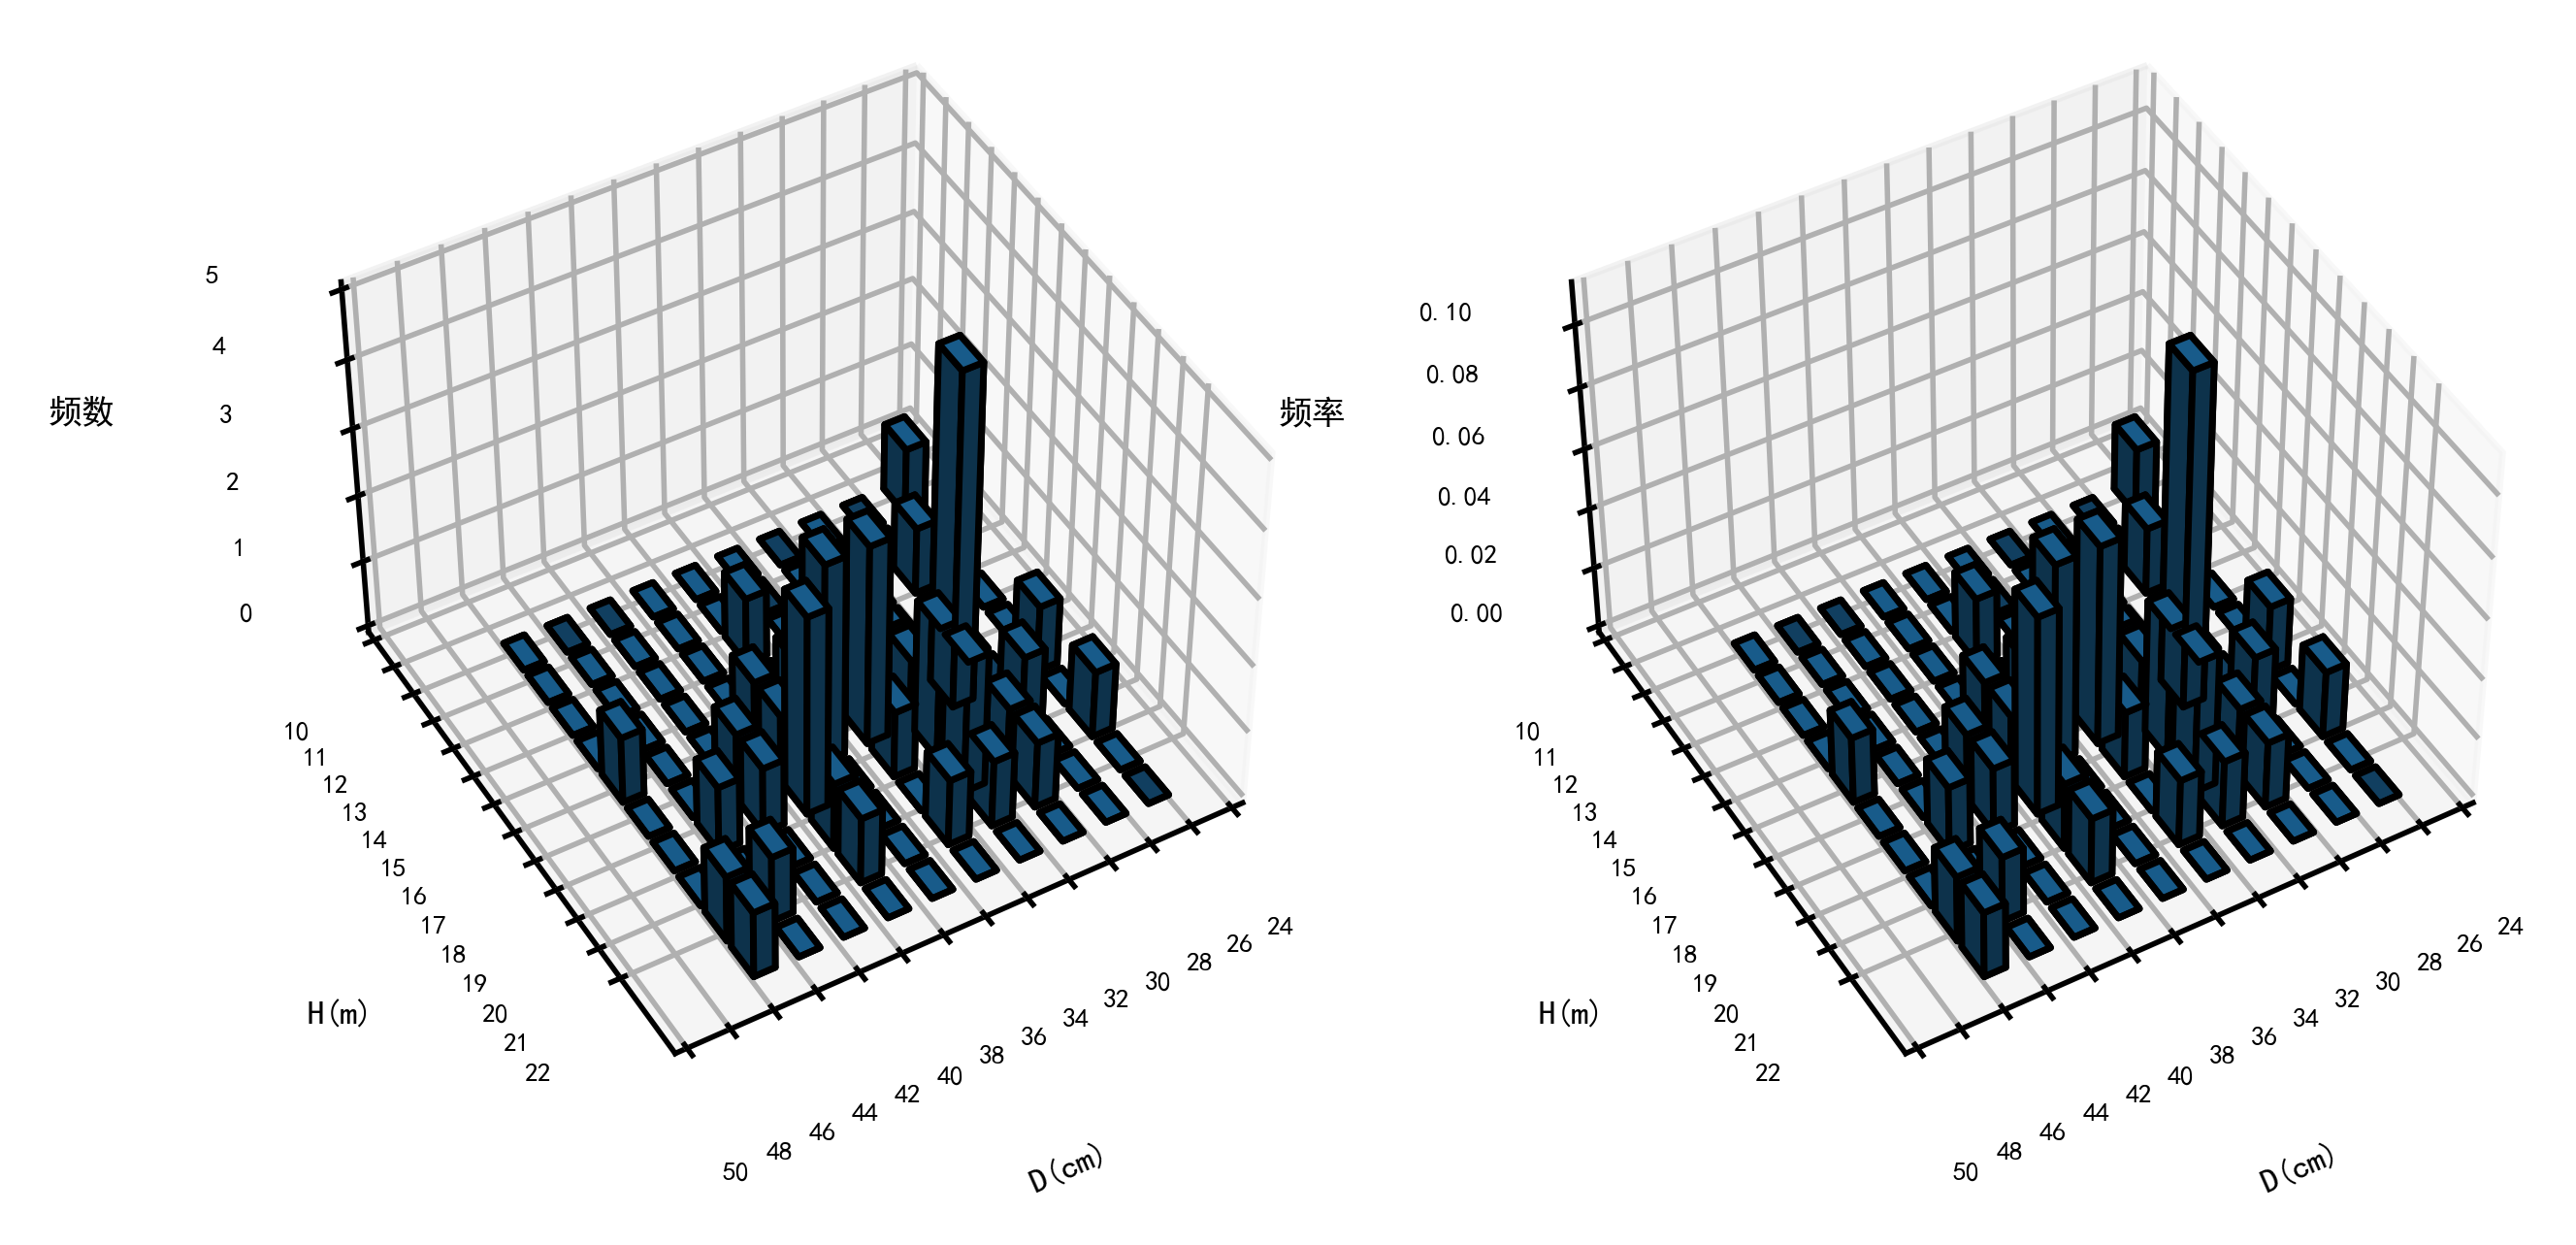

In [12]:
fig = plt.figure(dpi=500)
ax = fig.add_subplot(121, projection='3d')
x = df['胸径']
y = df['树高']
hist, xedges, yedges = np.histogram2d(x, y)
# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
# Construct arrays with the dimensions for the 16 bars.
dx = dy = 1 * np.ones_like(zpos)
dz = hist.ravel()
dz1 = dz/np.sum(dz)
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average',edgecolor='black')
ax.tick_params(labelsize=4)
fontdict={'fontsize':5}
ax.set_xlabel('D(cm)',fontdict)
ax.set_ylabel('H(m)',fontdict)
ax.set_zlabel('频数',fontdict)
plt.xticks(range(24,51,2))
plt.yticks(range(10,23,1))
ax1= fig.add_subplot(122, projection='3d')
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz1, zsort='average',edgecolor='black')
ax1.tick_params(labelsize=4)
fontdict={'fontsize':5}
ax1.set_xlabel('D(cm)',fontdict)
ax1.set_ylabel('H(m)',fontdict)
ax1.set_zlabel('频率',fontdict)
plt.xticks(range(24,51,2))
plt.yticks(range(10,23,1))
ax.view_init(45, 60)
ax1.view_init(45, 60)
plt.savefig(r'./输出数据/胸径树高频数频率分布.jpg',dpi=300)
plt.show()